Total entries: 29888, Underflow: 0, Inside: 29819, Overflow: 69
Total entries: 29888, Underflow: 0, Inside: 29495, Overflow: 393


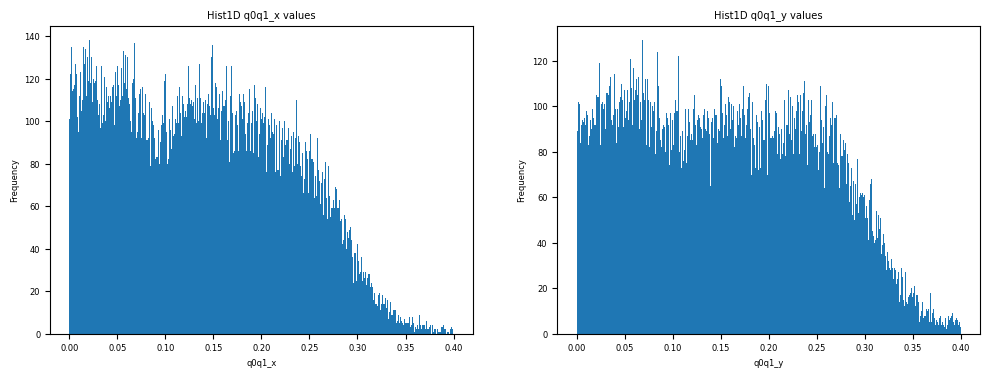

prm/srppac_q0q1_x_run1027.csv
ここまで
ファイル 'prm/srppac_q0q1_x_run1027.csv' に保存しました。
prm/srppac_q0q1_y_run1027.csv
ここまで
ファイル 'prm/srppac_q0q1_y_run1027.csv' に保存しました。
+---------+----------------+--------------------+--------------------+------+-------------------+------------------+------------------+------------------+-----+-----+-----+--------------------+------------+--------------------+--------------------+------+-------------------+------------------+------------------+------------------+-----+-----+-----+--------------------+-------+
|hbfNumber|            id_x|            timing_x|            charge_x|size_x|          timing0_x|         charge0_x|         charge1_x|         charge2_x|id0_x|id1_x|id2_x|              q0q1_x|        id_y|            timing_y|            charge_y|size_y|          timing0_y|         charge0_y|         charge1_y|         charge2_y|id0_y|id1_y|id2_y|              q0q1_y|runname|
+---------+----------------+--------------------+--------------------+------+-

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from matplotlib import pyplot as plt
from hist.sparkHist1d import Hist1D
from make_SRPPAC_prm import dq_calib_data
import numpy as np

spark = SparkSession.builder.master("local[10]").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

df = spark.read.parquet("parquet/run1027_srppac.parquet")
df = df.filter("size_x<7 and size_y<7")
df = df.filter("size_x>1 AND size_y>1")
# Charge0 and Charge1 strips should be adjacent
df = df.filter("ABS(id0_x - id1_x) = 1 AND ABS(id0_y - id1_y) = 1")
runname = df.select("runname").collect()[0][0]

NBINS = 400
HIST_RANGE = (0,0.4)

plt.figure(0, figsize=(12,4))
plt.rcParams["font.size"] = 6
ax =plt.subplot2grid((1,2),(0,0))
Center_x, Hx = Hist1D(df, "q0q1_x",NBINS,HIST_RANGE)
ax =plt.subplot2grid((1,2),(0,1))
Center_y, Hy = Hist1D(df, "q0q1_y",NBINS,HIST_RANGE)
plt.show()

r = dq_calib_data(Hx,"prm/srppac_q0q1_x_{}.csv".format(runname),HIST_RANGE,NBINS)
r = dq_calib_data(Hy,"prm/srppac_q0q1_y_{}.csv".format(runname),HIST_RANGE,NBINS)

df.filter("q0q1_x<0.001").show()

